In [538]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('white')

In [539]:
loan_df = pd.read_csv('data/lending_club_loan_two.csv')

In [540]:
info_df = pd.read_csv('data/lending_club_info.csv')

# Feature info

In [541]:
info_df

,LoanStatNew,Description
0,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if the loan originates.
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when applying for the loan.*
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
9,annual_inc,The self-reported annual income provided by the borrower during registration.


In [542]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Missing Data Analysis

In [543]:
loan_df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [544]:
pd.set_option('display.max_colwidth', None)
info_df.query('LoanStatNew in ["emp_title", "emp_length", "title", "revol_util", "mort_acc", "pub_rec_bankruptcies"]')

,LoanStatNew,Description
6,emp_title,The job title supplied by the Borrower when applying for the loan.*
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
14,title,The loan title provided by the borrower
22,revol_util,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
26,mort_acc,Number of mortgage accounts.
27,pub_rec_bankruptcies,Number of public record bankruptcies


## emp_length

I need to investigate:
1. if the missing value = unemployed
2. if not, how does this value correlated to other values

In [545]:
loan_df.loc[loan_df['emp_length'].isnull()][['emp_title', 'emp_length']].head(50)

,emp_title,emp_length
35,NaN,NaN
36,NaN,NaN
49,NaN,NaN
58,NaN,NaN
91,NaN,NaN
155,NaN,NaN
168,NaN,NaN
187,NaN,NaN
218,NaN,NaN
246,NaN,NaN


It seems like without emp_length, they are unemployed as they do not have an employment title as well.

I will allocate 0 to all NaN

In [546]:
loan_df['emp_length'].fillna('Unemployed', inplace = True)

In [547]:
loan_df['emp_length'].value_counts()

10+ years     126041
2 years        35827
< 1 year       31725
3 years        31665
5 years        26495
1 year         25882
4 years        23952
6 years        20841
7 years        20819
8 years        19168
Unemployed     18301
9 years        15314
Name: emp_length, dtype: int64

## emp_title

There is too much variation, I will be dropping the whole column for this project.

In [548]:
loan_df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [549]:
loan_df.drop('emp_title', axis=1, inplace=True)

## title

In [550]:
loan_df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [551]:
loan_df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

I will drop the 'title' column as 'purpose' column suffice.

In [552]:
loan_df.drop('title', axis=1, inplace=True)

## revol_util + pub_rec_bankruptcies

There is only a few missing data, since the dataset is so huge, I will be dropping those rows.

In [553]:
loan_df.dropna(subset=['revol_util', 'pub_rec_bankruptcies'], inplace=True)

## final verification

In [554]:
loan_df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37205
pub_rec_bankruptcies        0
address                     0
dtype: int64

## mort_acc


/Users/ottenheimer/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mort_acc', ylabel='count'>

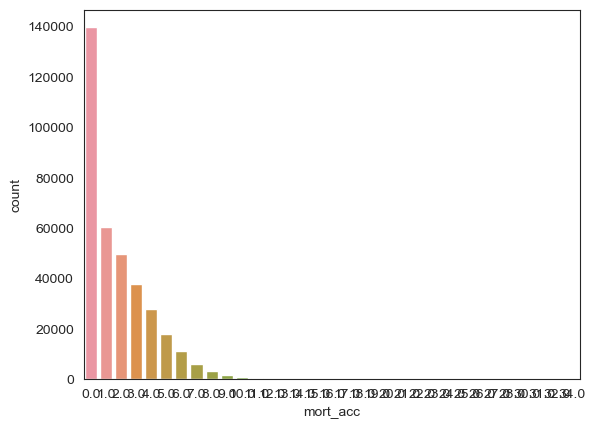

In [555]:
sns.countplot(loan_df['mort_acc'])

*I will use a regression model to replace the missing data after feature encoding*

# Feature Encoding

# Address Extraction

In [556]:
loan_df['address']

0                 0174 Michelle Gateway\nMendozaberg, OK 22690
1              1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2              87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                        823 Reid Ford\nDelacruzside, MA 00813
4                         679 Luna Roads\nGreggshire, VA 11650
                                  ...                         
396025          12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA 05113
396027        953 Matthew Points Suite 414\nReedfort, NY 70466
396028      7843 Blake Freeway Apt. 229\nNew Michael, FL 29597
396029             787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [557]:
def get_state(address):
    return address.split()[-2]

loan_df['state'] = loan_df['address'].apply(get_state)
loan_df['state'].head()

0    OK
1    SD
2    WV
3    MA
4    VA
Name: state, dtype: object

In [558]:
def get_zip(address):
    return address.split()[-1]

loan_df['zip'] = loan_df['address'].apply(get_zip)
loan_df['zip'].head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: zip, dtype: object

In [559]:
loan_df.drop('address', axis =1, inplace=True)

## Convert Date Time

## issue_d

In [560]:
loan_df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

In [561]:
loan_df['issue_year'] = loan_df['issue_d'].apply(lambda d: int(d.split('-')[1]))

In [562]:
import calendar

abbr_to_num = {name: num for num, name in enumerate(calendar.month_abbr) if num}

loan_df['issue_month'] = loan_df['issue_d'].apply(lambda d: d.split('-')[0])
loan_df['issue_month'] = loan_df['issue_month'].replace(abbr_to_num)
loan_df['issue_month'].value_counts()

10    42075
7     39655
1     34534
11    34027
4     33201
8     32766
5     31873
3     31805
6     30117
12    28989
2     28594
9     27583
Name: issue_month, dtype: int64

In [563]:
loan_df.drop('issue_d', axis=1, inplace=True)

## earliest_cr_line

In [564]:
loan_df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jul-1955       1
Oct-1950       1
May-1958       1
Nov-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [565]:
loan_df['earliest_cr_line_y'] = loan_df['earliest_cr_line'].apply(lambda d: int(d.split('-')[1]))

loan_df['earliest_cr_line_m'] = loan_df['earliest_cr_line'].apply(lambda d: d.split('-')[0])
loan_df['earliest_cr_line_m'] = loan_df['earliest_cr_line_m'].replace(abbr_to_num)

loan_df.drop('earliest_cr_line', axis=1,inplace=True)

## Convert to Dummies

- term
- grade
- sub_grade
- emp_length
- home_ownership
- verification_status
- issue_month
- issue_year
- loan_status
- purpose
- initial_list_status
- application_type

In [566]:
feats = ['term',
         'grade',
         'sub_grade', 
         'emp_length',
         'home_ownership', 
         'verification_status', 
         'issue_month',
         'issue_year',
         'loan_status',
         'purpose',
         'initial_list_status',
         'application_type',
         'state'
        ]

loan = pd.get_dummies(loan_df, columns=feats, drop_first=True)

# Replacing mort_acc missing values

There is a trend according to the analysis above, hence I will use a regression model to generate the missing values.

In [567]:
loan[loan['mort_acc'].isnull() == True].count()

loan_amnt      37205
int_rate       37205
installment    37205
annual_inc     37205
dti            37205
               ...  
state_VT       37205
state_WA       37205
state_WI       37205
state_WV       37205
state_WY       37205
Length: 164, dtype: int64

<AxesSubplot:>

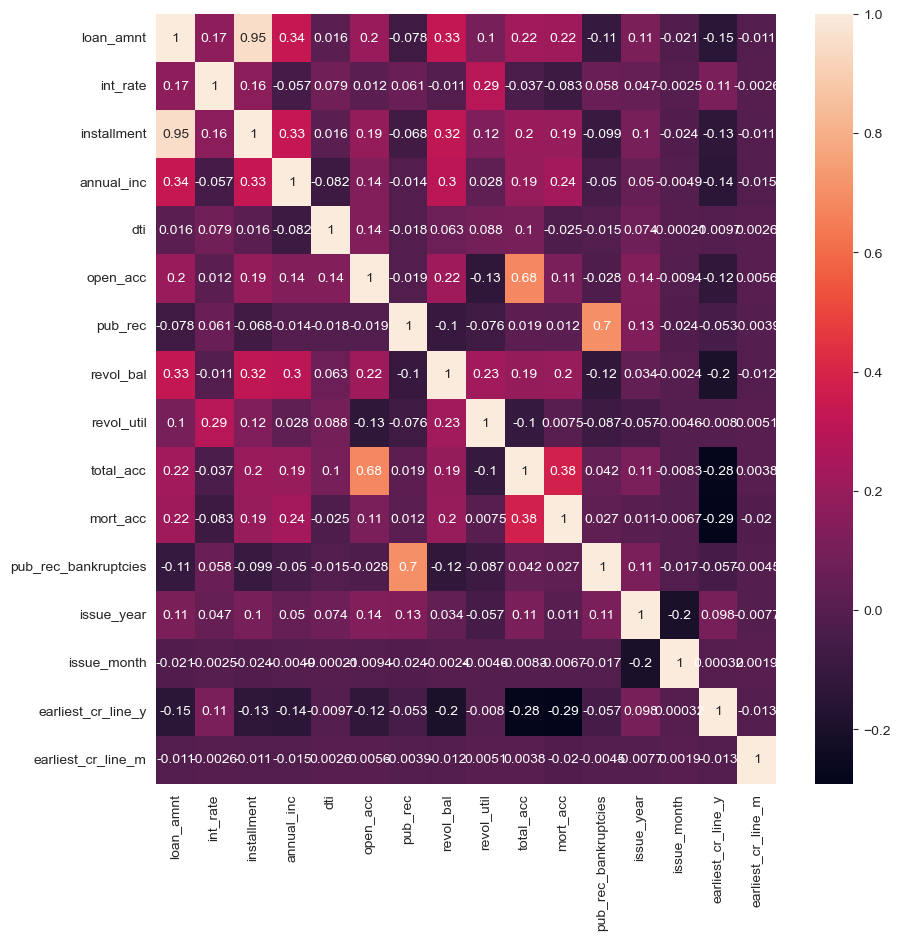

In [598]:
plt.figure(figsize=(10,10))
sns.heatmap(data=loan_df.corr(), annot=True)

From the heatmap, we can estimate that the most correlated values are:
1. 'total_acc': 0.38
2. 'revol_bal': 0.2
3. 'annual_inc': 0.24
4. 'installment': 0.19
5. 'loan_amnt': 0.22

In [606]:
from sklearn.linear_model import LogisticRegression

mort_acc_model = LogisticRegression(solver='sag', max_iter=5000)

In [607]:
from sklearn.model_selection import train_test_split

loan_no_null = loan.dropna(subset=['mort_acc'])

loan_no_null[loan_no_null['mort_acc'].isnull() == True].count()

loan_amnt      0
int_rate       0
installment    0
annual_inc     0
dti            0
              ..
state_VT       0
state_WA       0
state_WI       0
state_WV       0
state_WY       0
Length: 164, dtype: int64

In [613]:
X = loan_no_null[['total_acc', 'revol_bal']]
y = loan_no_null['mort_acc']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
mort_acc_model.fit(X_train, y_train)

In [ ]:
predictions = mort_acc_model.predict(X_test)

In [580]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets